<img src='sharif_logo.png' alt="SUT logo" width=150 height=150 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
 Deep Learning <br>
<font color=2565AE size=5>
Computer Engineering Department - Spring 2025  <br>
<font color=3C99D size=5>
          Homework 3: Practical - Oil Price Forecasting
 <br>
<font color=696880 size=4>
            Designer: Mohammad Amanlou
    
    

# 🛢️ Oil Price Prediction using Time Series Models 📈

This notebook is designed for students to complete tasks related to oil price prediction using different machine learning models. 🚀

## 📚 References
- 📊 [Dataset: Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)
- 📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)

## 1️⃣ Introduction
🔍 One of the most common applications of recurrent neural networks is **time series forecasting**. In this assignment, you will predict **crude oil prices** using four different methods. 💡

## 2️⃣ Dataset and Preprocessing (25 Points)

### 📥 2.1 Download Dataset
📌 Download the dataset from **Yahoo Finance** for `CL=F` from **2010 to the present**.
[Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)

### 🎯 2.2 Select Features
✅ Select the `Adj Close` column as the **main feature**.

### ⚠️ **2.3 Handle Missing Data**

You will encounter missing data (`null` values) within your dataset. Follow these detailed steps carefully to handle the missing values and create a complete, reliable dataset:

#### 📝 Step 1: Introduce Random Missing Data
- Identify all indices in the `Adj Close` column that currently have valid (non-null) data.
- Set a random seed (`np.random.seed(42)`) for reproducibility.
- Randomly select **10%** of these valid indices and set their values to `NaN`.

#### 🔍 Step 2: Identify Missing Values
- Identify all dates where at least one column has a missing value (`NaN`).
- Print the number of missing dates and the total number of dates to evaluate the extent of missingness.

#### 🔧 Step 3: Replace Missing Values
- Create a copy of the `Adj Close` column for filling purposes.
- First, apply **linear interpolation** to estimate missing values based on surrounding data points.
- Then, use backward fill (`bfill`) followed by forward fill (`ffill`) methods to handle any remaining missing values at the start or end of the dataset.

#### 🎯 Outcome:
After completing these steps, your dataset will have no missing values in the `Adj Close` column, ready for further analysis or modeling.

🛠 *Your task:* Implement the missing data handling methods below. (16 Points)

In [ ]:
import yfinance as yf
import pandas as pd

# TO Do: Read the data and pring 5 examples

In [ ]:
data = yf.download("CL=F", start="2010-01-01", end="2024-12-19")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data['Close']['CL=F'].head(5)

,CL=F
Date,
2010-01-04,81.510002
2010-01-05,81.769997
2010-01-06,83.180000
2010-01-07,82.660004
2010-01-08,82.750000


In [ ]:
import yfinance as yf
import pandas as pd

# TO Do: Read the data and pring 5 examples



data = yf.download("CL=F", start="2010-01-01", end="2024-12-19")
date_range = pd.date_range(start="2010-01-01", end="2024-12-19", freq="D")

c_data = data['Close']['CL=F']
c_data.head(5)

[*********************100%***********************]  1 of 1 completed


,CL=F
Date,
2010-01-04,81.510002
2010-01-05,81.769997
2010-01-06,83.180000
2010-01-07,82.660004
2010-01-08,82.750000


In [ ]:
# TO DO: Introduce random null

import numpy as np
non_null_indices = c_data.dropna().index

sel_size = int(len(non_null_indices) * 0.1)
indices_to_null = np.random.choice(non_null_indices, size=sel_size, replace=False)
c_data.loc[indices_to_null] = np.nan

<ipython-input-28-64ec6b3bb2d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_data.loc[indices_to_null] = np.nan


In [ ]:
c_data.isna().sum()

np.int64(714)

In [ ]:
c_data[date_range[5]]

np.float64(83.18000030517578)

In [ ]:
c_data

,CL=F
Date,
2010-01-04,NaN
2010-01-05,81.769997
2010-01-06,83.180000
2010-01-07,82.660004
2010-01-08,82.750000
...,...
2024-12-12,70.019997
2024-12-13,NaN
2024-12-16,70.709999


In [ ]:
final_df = {'date': [], 'price': []}

for date in date_range:
  final_df['date'].append(date)
  if date in c_data:
    final_df['price'].append(c_data[date])
  else:
    final_df['price'].append(np.nan)

final_df = pd.DataFrame(final_df)

In [ ]:
# TO DO: Identify missing dates and null values
print('Num of missing dates:')
print(final_df.isna().sum().sum())
print('Num of all dates:')
print(len(final_df))

Num of missing dates:
2417
Num of all dates:
5467


In [ ]:
# TO DO: Fill missing values using .interpolate or .fillna(method='bfill').fillna(method='ffill')

filled_data = final_df.fillna(method='bfill').fillna(method='ffill')

<ipython-input-61-2a3b140d29fe>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = final_df.fillna(method='bfill').fillna(method='ffill')


In [ ]:
# TO DO: Identify missing dates and null values
print('Num of missing dates:')
print(filled_data.isna().sum().sum())
print('Num of all dates:')
print(len(final_df))

Num of missing dates:
0
Num of all dates:
5467


### ✂️ 2.4 Train-Test Split and Normalization
- **Split** the dataset into **training and test sets** based on the ratio given in the reference paper.
- **Normalize** the data.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)

🛠 *Your task:* Implement the splitting and normalization below. (4 Points)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def temporal_split(series, train_ratio=0.6, val_ratio=0.2):
    train_data, val_test_data = train_test_split(series, test_size=0.4, shuffle=False)
    val_data, test_data = train_test_split(val_test_data, test_size=0.5, shuffle=False)
    return train_data, val_data, test_data

train_list, val_list, test_list = [], [], []

train, val, test = temporal_split(filled_data)
train_list.append(train)
val_list.append(val)
test_list.append(test)

train_data = pd.concat(train_list)
val_data = pd.concat(val_list)
test_data = pd.concat(test_list)


scaler = MinMaxScaler()
train_data['price'] = scaler.fit_transform(train_data[['price']])
val_data['price'] = scaler.transform(val_data[['price']])
test_data['price'] = scaler.transform(test_data[['price']])
print("Training data sample:")
print(train_data.head())
print("Testing data sample:")
print(test_data.head())

Training data sample:
        date     price
0 2010-01-01  0.633379
1 2010-01-02  0.633379
2 2010-01-03  0.633379
3 2010-01-04  0.633379
4 2010-01-05  0.633379
Testing data sample:
           date     price
4373 2021-12-22  0.530666
4374 2021-12-23  0.542408
4375 2021-12-24  0.562699
4376 2021-12-25  0.562699
4377 2021-12-26  0.562699


### 📊 2.5 Data Visualization
- **Plot a histogram** similar to **Figure 6** in the reference paper, showing the **distribution of oil prices**.

🛠 *Your task:* Implement the histogram plot below. (5 Points)

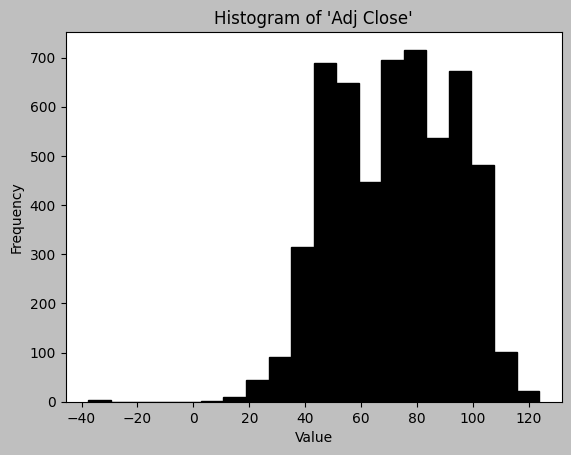

In [ ]:
# TO DO: Plot histogram of 'Adj Close'

import matplotlib.pyplot as plt

# plt.style.use('grayscale')  # Optional: for grayscale style
plt.hist(filled_data['price'], bins=20, edgecolor='black')

# Titles and labels
plt.title("Histogram of 'Adj Close'")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()

## 3️⃣ Implementing Deep Learning Models 🤖 (60 Points)

The reference paper utilizes **three models** for time series forecasting:
- `RNN`
- `LSTM`
- `GRU`

📌 **Train** each model using the **hyperparameters** given in **Table 4** of the paper.
📌 Use `Mean Square Error (MSE)` as the **loss function**.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)


### Important Details & Clarifications

- **What to Predict?**  
  The goal is to predict **the actual next-day price** (regression problem), rather than just identifying price increase or decrease.
  
- **Input/Output Structure:**  
  - **Input:** A window of \( k \) consecutive daily prices (e.g., 50 days).  
  - **Output:** The predicted price for the next day.
  
- **How to Evaluate?**  
  Use the four metrics (RMSE, MAE, MAPE, \( R^2 \)) to gauge how accurately your model tracks the real price values.

- **Target Accuracy:**  
  Your accuracy might differ from the paper’s due to factors like data splitting, normalization, or different random seeds. However, aim to closely replicate the paper’s results or provide justifications for any discrepancy.

**Final Deliverables:**
1. **All four trained models** (RNN, LSTM, GRU).  
2. **Comparison plots** of predicted vs. actual values (in both normalized and original price scales, if desired).  
3. **Performance metrics** (RMSE, MAE, MAPE, \( R^2 \)) for each model, presented in a table or a concise summary.


🛠 *Your task:* Implement these models below. (30 Points)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

def create_sequences(data, window_size):
    pass
    #TO DO

window_size = 50
#TO DO: make test and train loader


In [ ]:
# LSTM
class LSTMModel(nn.Module):
    pass
    #TO DO

lstm_model = LSTMModel()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

def train_model(model, train_loader, test_loader, epochs=50):
    pass
    #TO DO

train_model(lstm_model, train_loader, test_loader)

Epoch 0, Validation Loss: 0.0322
Epoch 10, Validation Loss: 0.0254
Epoch 20, Validation Loss: 0.0161
Epoch 30, Validation Loss: 0.0086
Epoch 40, Validation Loss: 0.0050


In [ ]:
class RNNModel(nn.Module):
    pass
    #TO DO

rnn_model = RNNModel()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
train_model(rnn_model, train_loader, test_loader)


Epoch 0, Validation Loss: 0.8994
Epoch 10, Validation Loss: 0.1117
Epoch 20, Validation Loss: 0.0141
Epoch 30, Validation Loss: 0.0513
Epoch 40, Validation Loss: 0.0385


In [ ]:
# GRU
class GRUModel(nn.Module):
    pass
    #TO DO

gru_model = GRUModel()
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
train_model(gru_model, train_loader, test_loader)

Epoch 0, Validation Loss: 0.0286
Epoch 10, Validation Loss: 0.0229
Epoch 20, Validation Loss: 0.0219
Epoch 30, Validation Loss: 0.0176
Epoch 40, Validation Loss: 0.0098


### 📈 3.1 Prediction and Evaluation
1. **Prediction:** After training, generate predictions for the test set (i.e., predict the next-day price based on the preceding \( k \) days).
2. **Visualization:** **Plot the predicted values** alongside the **actual values** for each model. This comparison helps in visually assessing each model’s performance.

🛠 **Your Task:** Implement the **visualization of predictions** (15 Points).

In [ ]:
# Predictions
def predict(model, data_loader):
    pass
    #TO DO

#TO DO: predict real outputs

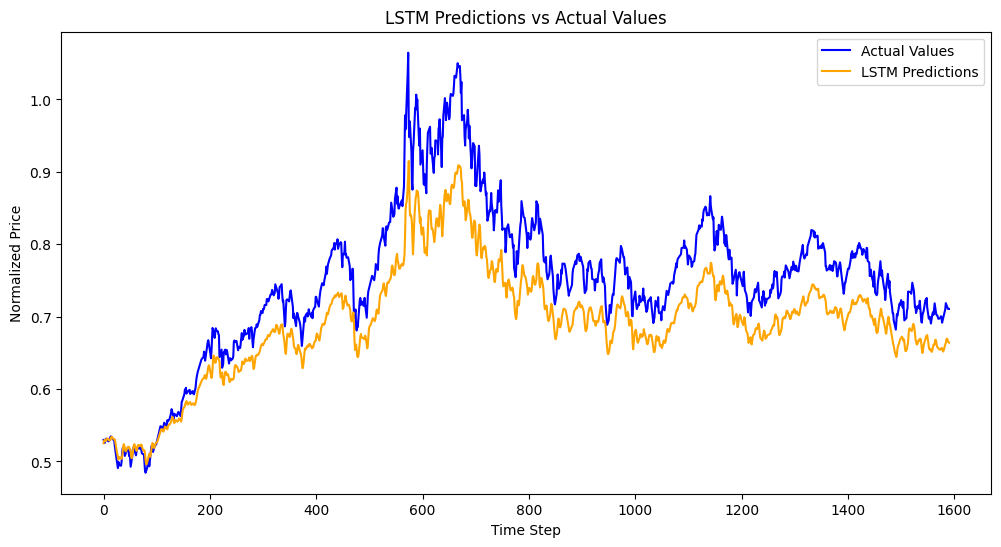

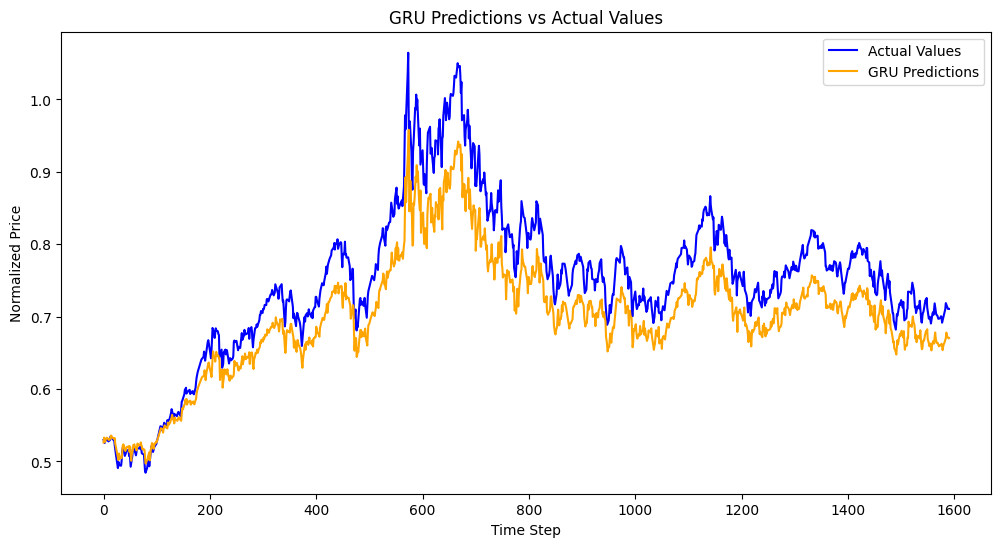

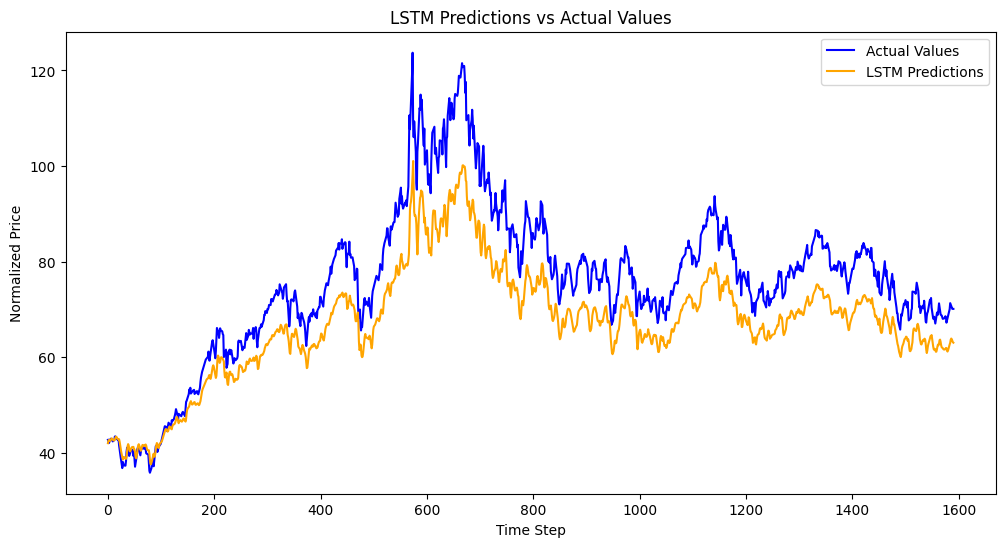

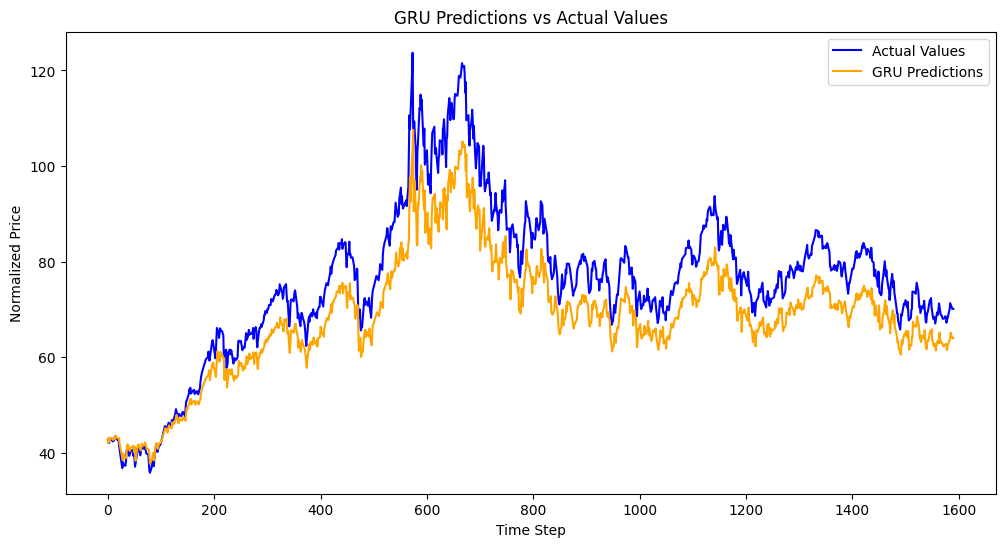

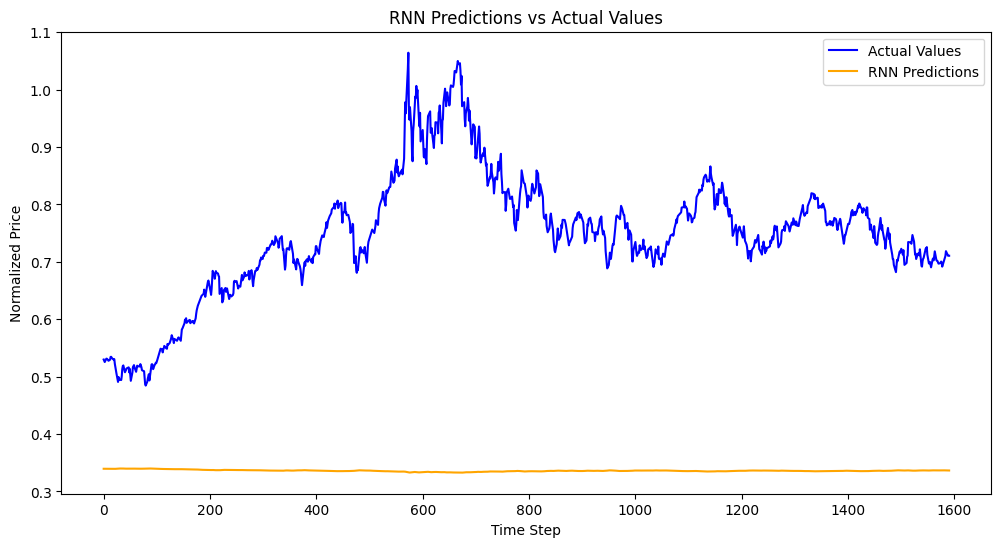

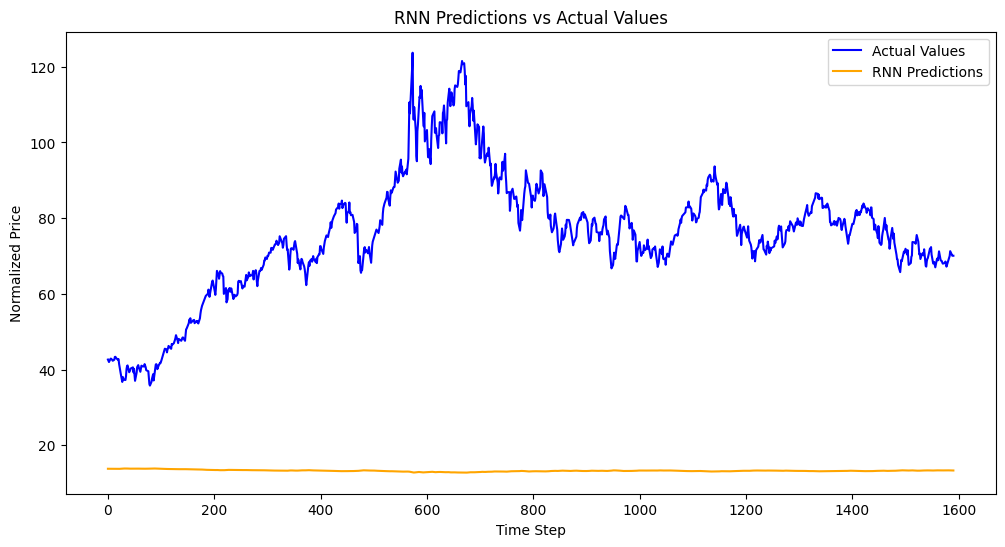

In [ ]:
def plot_predictions(predictions, actual, model_name):
    pass
    #TO DO

#TO DO: plot all models predictions on all data

### 📊 3.2 Error Metrics
📌 Explain the following **error metrics** used in the paper:
- `RMSE` (Root Mean Square Error)
- `MAE` (Mean Absolute Error)
- `MAPE` (Mean Absolute Percentage Error)
- `R-Squared` (Coefficient of Determination)

**📌 Instruction:**  
Explain each of these error metrics and calculate them for **each model** (RNN, LSTM, GRU). Compare your results with the paper’s findings to see how closely they match.

🛠 *Your task:* Implement the evaluation metrics below. (15 Points)

In [ ]:
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(predictions, actual):
    pass
    #TO DO

print("RNN Metrics (Unscaled):", calculate_metrics(rnn_predictions, actual_values))
print("LSTM Metrics (Unscaled):", calculate_metrics(lstm_predictions, actual_values))
print("GRU Metrics (Unscaled):", calculate_metrics(gru_predictions, actual_values))

RNN Metrics (Unscaled): (62.365562, 64.49024, -14.85493471118362, 81.34364485740662)
LSTM Metrics (Unscaled): (8.656819, 9.671368, 0.643423921541517, 10.703559964895248)
GRU Metrics (Unscaled): (7.3945055, 8.183927, 0.7446711850030194, 9.195249527692795)


In [ ]:
# Fill missing values for all features
filled_data = data.copy()
for column in ['Open', 'High', 'Low', 'Volume', 'Adj Close']:
    filled_data[column] = filled_data[column].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# WE WILL USE THESE IN ARIMA PART AS INPUTS OF MODELS
train_data = filled_data.iloc[:-int(0.3 * len(filled_data))]
test_data = filled_data.iloc[-int(0.3 * len(filled_data)):]
train_target = train_data['Adj Close']
train_exog = train_data[['Open', 'High', 'Low', 'Volume']]
test_exog = test_data[['Open', 'High', 'Low', 'Volume']]

# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data['Adj Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")
print("The series is stationary." if result[1] < 0.05 else "The series is not stationary.")

ADF Statistic: -1.3175200901257018
p-value: 0.6211192230668825
Critical Values: {'1%': -3.4320679607261453, '5%': -2.86229910063996, '10%': -2.5671740791451567}
The series is not stationary.


<ipython-input-28-90368e7bcdd5>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data[column] = filled_data[column].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


## 4️⃣ ARIMA Model 📉 (15 Points)

📌 Explain the **difference** between `ARIMA` and `SARIMA` models.

📌 List the **advantages** and **limitations** of `ARIMA`.

📌 Explain the **mathematical formulation** of `ARIMA`, including its **parameters**.

📌 Determine the **optimal parameters** for `ARIMA` and **report the results**.

📌 Compare the results with **Table 6** from the paper.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)

🛠 *Your task:* Implement the ARIMA model below.

In [ ]:
# Train ARIMA model using auto_arima
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#TO DO:Find optimal arima model using auto_arima
print(f"Optimal ARIMA Order: {arima_model.order}")

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13112.198, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13114.977, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13103.285, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13102.068, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13113.223, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13099.774, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13070.265, Time=0.67 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13043.542, Time=1.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13060.941, Time=0.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13038.415, Time=1.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13037.178, Time=0.92 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=13038.639, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=13038.854, Time=1.91 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13095.414, Time=0.28 sec
 ARIMA(4,1,0)(0,0,0

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="statsmodels")

#TO DO: Predinct Arima outputs

Processing ARIMA predictions: 100%|██████████| 1640/1640 [19:52<00:00,  1.38it/s]

ARIMA Metrics (Unscaled): (0.8697098477810211, 1.3583054514301331, 0.9936417162303871, 1.1364695957188116)


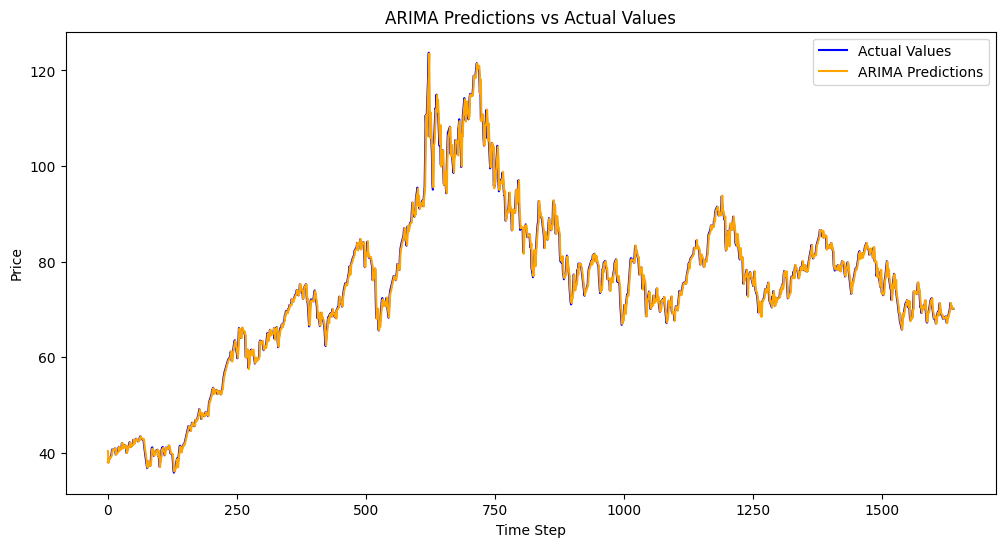

In [ ]:
#TO DO: Plot ARIMA vs actual

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
order_combinations = [(3,1,2)]
seasonal_combinations = [(3,1,1,12)]
# Initialize variables to store the best results
best_aic = float("inf")
best_order = None
best_seasonal_order = None
best_model = None

# Grid search over all parameter combinations
for order in order_combinations:
    for seasonal_order in seasonal_combinations:
        try:
            #TO DO: Train SARIMA model
            pass

            #TO DO: Check AIC

        except Exception as e:
            print(e)
            continue

print(f"Best SARIMA Model: Order={best_order}, Seasonal_Order={best_seasonal_order}, AIC={best_aic}")
print(best_model.summary())

Best SARIMA Model: Order=(3, 1, 2), Seasonal_Order=(3, 1, 1, 12), AIC=7945.564607934014
                                      SARIMAX Results                                       
Dep. Variable:                            Adj Close   No. Observations:                 3827
Model:             SARIMAX(3, 1, 2)x(3, 1, [1], 12)   Log Likelihood               -3958.782
Date:                              Sun, 22 Dec 2024   AIC                           7945.565
Time:                                      21:20:22   BIC                           8033.015
Sample:                                  01-01-2010   HQIC                          7976.638
                                       - 06-23-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open      

In [ ]:
#TO DO: Batch forecasting for SARIMA

SARIMA without history Metrics (Batch): (10.669658451024176, 11.914894310768716, 0.5107561130989908, 13.238361239786137)


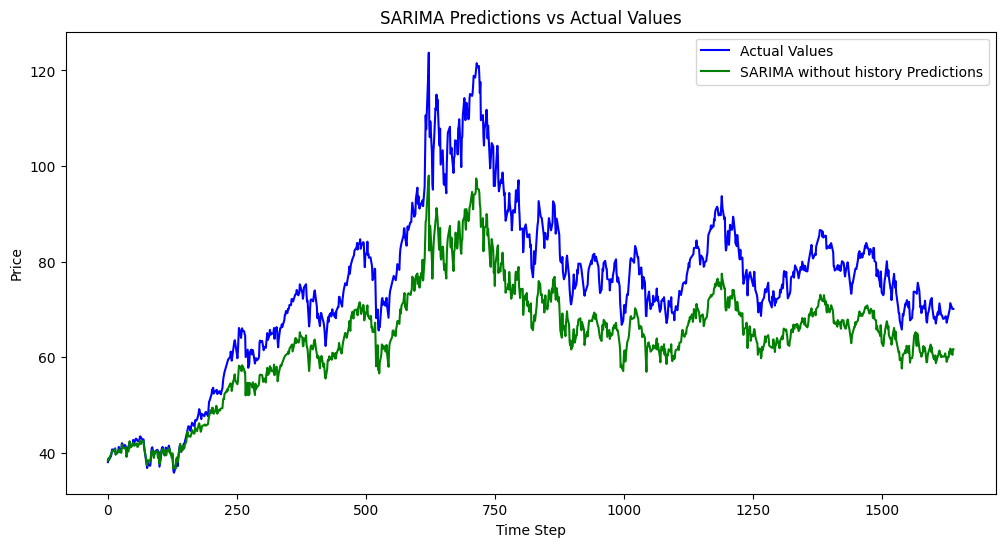

In [ ]:
#TO DO: Plot SARIMA vs actual
